Hello there this is to showcase LNG datasets.

So here we want to read in the file, run some data exploration and some time series with some stats.


In [3]:
import os

for dirname, _, filenames in os.walk('C://Users//kkwan//Downloads//kaggle//'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
#so this will just get all the files within the file path

C://Users//kkwan//Downloads//kaggle//all_fuels_data.csv
C://Users//kkwan//Downloads//kaggle//satellite image.zip
C://Users//kkwan//Downloads//kaggle//travel.sqlite
C://Users//kkwan//Downloads//kaggle//Credit Analysis\Credit Risk Modeling - Preparation - 3-1.ipynb
C://Users//kkwan//Downloads//kaggle//Credit Analysis\Credit Risk Modeling - Preparation - With Comments - 3-1.ipynb
C://Users//kkwan//Downloads//kaggle//Credit Analysis\LCDataDictionary.xlsx
C://Users//kkwan//Downloads//kaggle//Credit Analysis\loan_data_2007_2014.csv
C://Users//kkwan//Downloads//kaggle//satelite image\data\cloudy\train_10021.jpg
C://Users//kkwan//Downloads//kaggle//satelite image\data\cloudy\train_10043.jpg
C://Users//kkwan//Downloads//kaggle//satelite image\data\cloudy\train_10070.jpg
C://Users//kkwan//Downloads//kaggle//satelite image\data\cloudy\train_10081.jpg
C://Users//kkwan//Downloads//kaggle//satelite image\data\cloudy\train_10096.jpg
C://Users//kkwan//Downloads//kaggle//satelite image\data\cloudy\trai

In [3]:
import pandas as pd
df = pd.read_csv('C://Users//kkwan//Downloads//kaggle//all_fuels_data.csv')

# this where were the data came from https://www.kaggle.com/datasets/ahmettyilmazz/fuel-consumption

In [4]:
df.head()

,ticker,commodity,date,open,high,low,close,volume
0,CL=F,Crude Oil,2000-08-23,31.950001,32.799999,31.950001,32.049999,79385
1,CL=F,Crude Oil,2000-08-24,31.900000,32.240002,31.400000,31.629999,72978
2,CL=F,Crude Oil,2000-08-25,31.700001,32.099998,31.320000,32.049999,44601
3,CL=F,Crude Oil,2000-08-28,32.040001,32.919998,31.860001,32.869999,46770
4,CL=F,Crude Oil,2000-08-29,32.820000,33.029999,32.560001,32.720001,49131


In [5]:
df.describe()

,open,high,low,close,volume
count,27845.000000,27845.000000,27845.000000,27845.000000,2.784500e+04
mean,27.232736,27.624568,26.817137,27.231146,1.058859e+05
std,36.056984,36.512329,35.570272,36.060700,1.487083e+05
min,-14.000000,0.507000,-40.320000,-37.630001,0.000000e+00
25%,2.024500,2.053900,1.992300,2.025000,2.633900e+04
50%,3.387000,3.465700,3.315900,3.386000,4.889900e+04
75%,54.450001,55.419998,53.599998,54.450001,1.142000e+05
max,146.080002,147.429993,144.270004,146.080002,2.288230e+06


In [6]:
#lets see where we have missing data.
isnull_number = []
for i in df.columns:
    x = df[i].isnull().sum()
    isnull_number.append(x)

pd.DataFrame(isnull_number, index = df.columns, columns=['Total Missing Value'])

,Total Missing Value
ticker,0
commodity,0
date,0
open,0
high,0
low,0
close,0
volume,0


In [7]:
#what are the unique numbers there?
unique_number = []
for i in df.columns:
    x = df[i].value_counts().count()
    unique_number.append(x)

pd.DataFrame(unique_number, index = df.columns, columns=['Total Unique Value'])

,Total Unique Value
ticker,5
commodity,5
date,5944
open,16928
high,17051
low,16861
close,19076
volume,24920


In [8]:
df['commodity'].unique()

array(['Crude Oil', 'Heating Oil', 'Natural Gas', 'RBOB Gasoline',
       'Brent Crude Oil'], dtype=object)

So, the checks above is to understand if we have some funny datasets, missing values and how many uniques we have. From this we can see we have a few different types of oils. 'Crude Oil', 'Heating Oil', 'Natural Gas', 'RBOB Gasoline', 'Brent Crude Oil.

Ok now let's make sure the field are the right type. Below we can see that they are object and floats.'

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27845 entries, 0 to 27844
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ticker     27845 non-null  object 
 1   commodity  27845 non-null  object 
 2   date       27845 non-null  object 
 3   open       27845 non-null  float64
 4   high       27845 non-null  float64
 5   low        27845 non-null  float64
 6   close      27845 non-null  float64
 7   volume     27845 non-null  int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 1.7+ MB


So let's make the date into datetime.

In [12]:
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(by='date')

In [13]:
print("Max date is:", df['date'].max())
print("Min date is:", df['date'].min())

Max date is: 2024-04-17 00:00:00
Min date is: 2000-08-23 00:00:00


In [36]:
df.head()

,ticker,commodity,date,open,high,low,close,volume
0,CL=F,Crude Oil,2000-08-23,31.950001,32.799999,31.950001,32.049999,79385
1,CL=F,Crude Oil,2000-08-24,31.900000,32.240002,31.400000,31.629999,72978
2,CL=F,Crude Oil,2000-08-25,31.700001,32.099998,31.320000,32.049999,44601
3,CL=F,Crude Oil,2000-08-28,32.040001,32.919998,31.860001,32.869999,46770
4,CL=F,Crude Oil,2000-08-29,32.820000,33.029999,32.560001,32.720001,49131


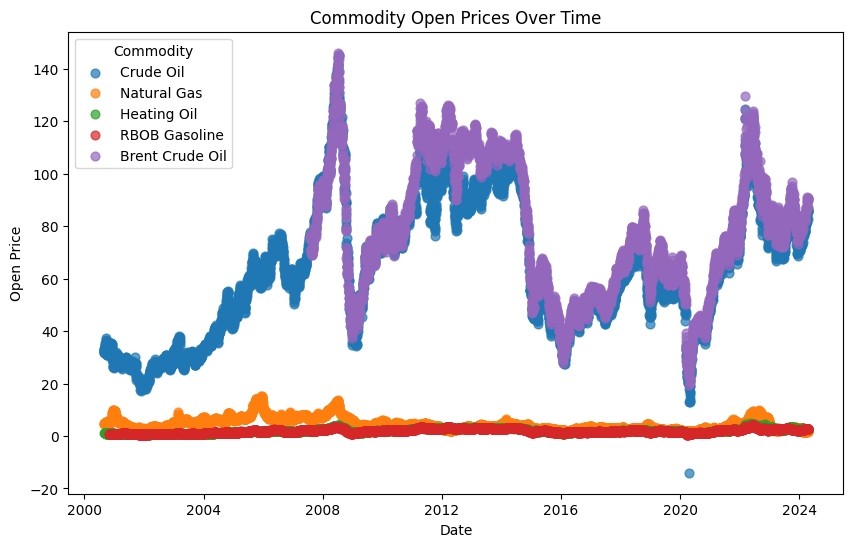

In [14]:
import matplotlib.pyplot as plt

# Group by commodity and plot each group
fig, ax = plt.subplots(figsize=(10, 6))  # Create figure and axes objects

# Iterate over unique commodities
for commodity in df['commodity'].unique():
    # Filter rows corresponding to the current commodity
    commodity_data = df[df['commodity'] == commodity]
    # Create a scatterplot for the current commodity
    ax.scatter(commodity_data['date'], commodity_data['open'], label=commodity, alpha=0.7,s = 40)

# Add title, labels, and legend
ax.set_title('Commodity Open Prices Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Open Price')
ax.legend(title='Commodity')  # Add a legend with a title
plt.show()

Looking at it it seems that the Brent Crude Oil and the Crude Oil is very similar. So let's look into them!

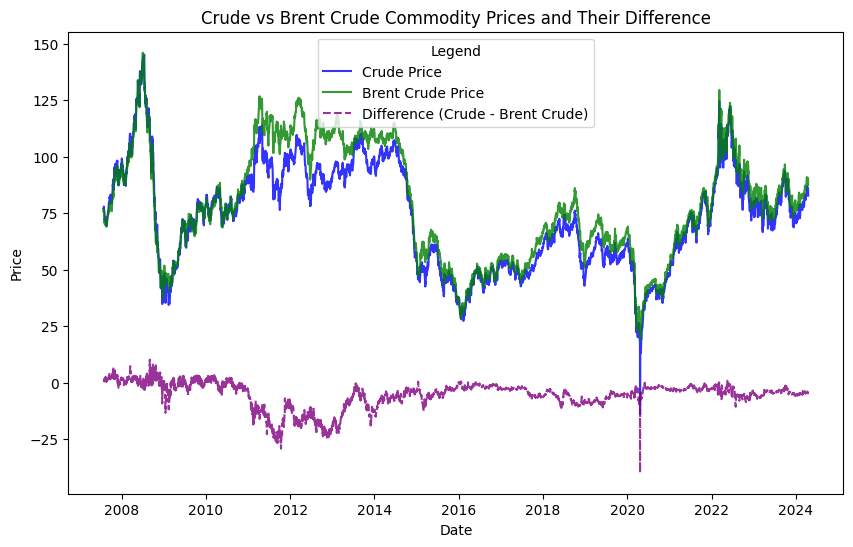

In [16]:
#filter data for the two types
type1_data = df[df['commodity'] == 'Crude Oil']
type2_data = df[df['commodity'] ==  'Brent Crude Oil']

# Ensure both types have the same dates for comparison
common_dates = set(type1_data['date']) & set(type2_data['date'])  # Find common dates
type1_data = type1_data[type1_data['date'].isin(common_dates)]
type2_data = type2_data[type2_data['date'].isin(common_dates)]

# Calculate the difference in 'open' prices
difference = type1_data['open'].values - type2_data['open'].values

# Plot type1, type2, and the difference
plt.figure(figsize=(10, 6))
plt.plot(type1_data['date'], type1_data['open'], label='Crude Price', color='blue', alpha=0.8)
plt.plot(type2_data['date'], type2_data['open'], label='Brent Crude Price', color='green', alpha=0.8)
plt.plot(type1_data['date'], difference, label='Difference (Crude - Brent Crude)', color='purple', linestyle='--', alpha=0.8)

# Add title, labels, and legend
plt.title('Crude vs Brent Crude Commodity Prices and Their Difference')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(title='Legend')
plt.show()

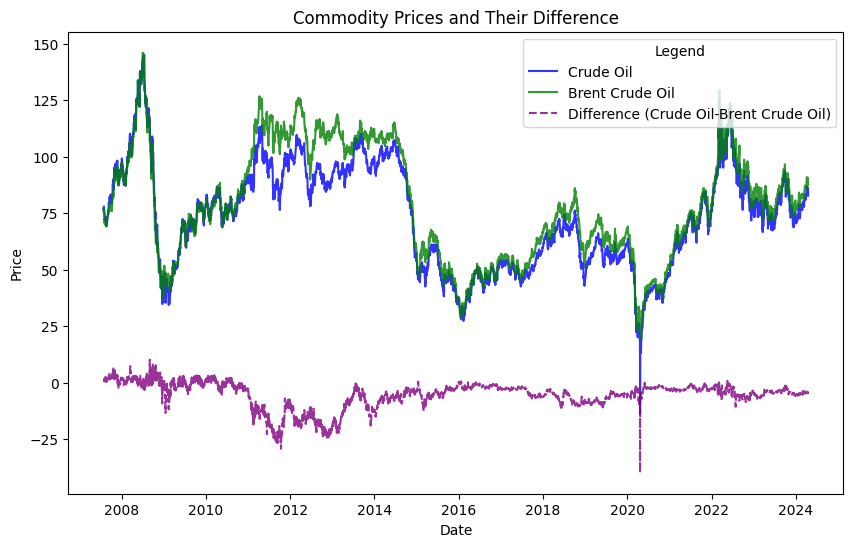

In [17]:
def plot_differences(df, type1, type2):
    # Filter data for the two types
    type1_data = df[df['commodity'] == type1]
    type2_data = df[df['commodity'] == type2]
    
    # Debugging: Ensure data is filtered correctly
    # print(f"Type 1 data ({type1}) head:\n", type1_data.head())
    # print(f"Type 2 data ({type2}) head:\n", type2_data.head())

    # Ensure both types have the same dates for comparison
    common_dates = set(type1_data['date']) & set(type2_data['date'])
  #  print("Common dates:", common_dates)  # Debugging step
    type1_data = type1_data[type1_data['date'].isin(common_dates)].sort_values(by='date')
    type2_data = type2_data[type2_data['date'].isin(common_dates)].sort_values(by='date')

    # # Debugging: Ensure filtered data aligns correctly
    # print("Type 1 filtered data length:", len(type1_data))
    # print("Type 2 filtered data length:", len(type2_data))

    # Calculate the difference in 'open' prices
    difference = type1_data['open'].values - type2_data['open'].values
    # print("Difference array:", difference)  # Debugging step

    # Plot type1, type2, and the difference
    plt.figure(figsize=(10, 6))
    plt.plot(type1_data['date'], type1_data['open'], label=type1, color='blue', alpha=0.8)
    plt.plot(type2_data['date'], type2_data['open'], label=type2, color='green', alpha=0.8)
    plt.plot(type1_data['date'], difference, label='Difference (' + type1 + '-' + type2 + ')', color='purple', linestyle='--', alpha=0.8)

    # Add title, labels, and legend
    plt.title('Commodity Prices and Their Difference')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend(title='Legend')
    plt.show()

#now we have can plotthis each time for different types.
plot_differences(df, 'Crude Oil', 'Brent Crude Oil')

Now what about moving averages how could see those?

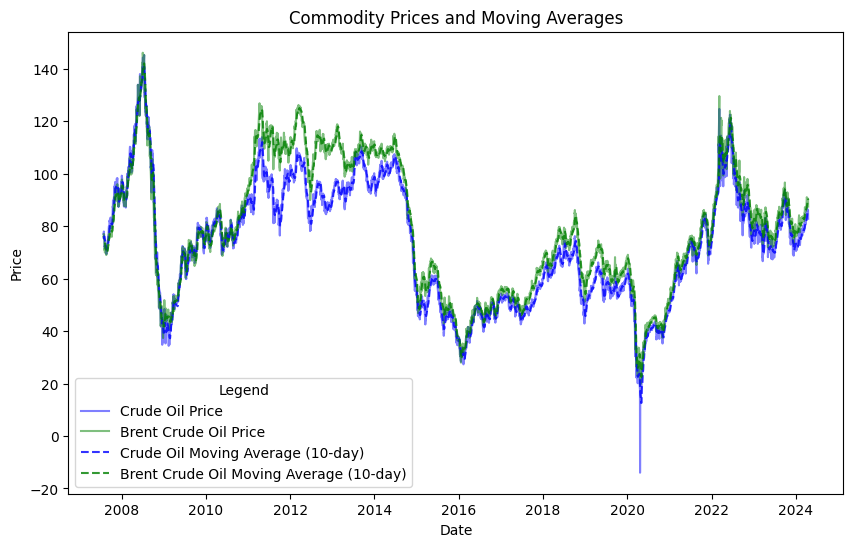

In [19]:
def plot_moving_averages(df, type1, type2):
    # Ensure data is sorted by date
    df = df.sort_values(by='date')

    # Calculate Moving Averages
    df['type1_MA'] = df[df['commodity'] == type1]['open'].rolling(window=10).mean()
    df['type2_MA'] = df[df['commodity'] == type2]['open'].rolling(window=10).mean()

    # Debugging: Check available commodities
    # print("Available commodities:", df['commodity'].unique())

    # Ensure both types have the same dates for comparison
    common_dates = set(df[df['commodity'] == type1]['date']) & set(df[df['commodity'] == type2]['date'])
    # print("Number of common dates:", len(common_dates))
    if len(common_dates) == 0:
        print("No common dates found!")
        return

    # Filter data for the two types
    type1_data = df[(df['commodity'] == type1) & (df['date'].isin(common_dates))]
    type2_data = df[(df['commodity'] == type2) & (df['date'].isin(common_dates))]

    # Debugging: Check filtered data
    # print("Filtered Type1 data:\n", type1_data.head())
    # print("Filtered Type2 data:\n", type2_data.head())

    # Plot Type1, Type2, and their Moving Averages
    plt.figure(figsize=(10, 6))

    # Original Prices
    plt.plot(type1_data['date'], type1_data['open'], label=f'{type1} Price', color='blue', alpha=0.5)
    plt.plot(type2_data['date'], type2_data['open'], label=f'{type2} Price', color='green', alpha=0.5)

    # Moving Averages
    plt.plot(type1_data['date'], type1_data['type1_MA'], label=f'{type1} Moving Average (10-day)', color='blue', linestyle='--', alpha=0.8)
    plt.plot(type2_data['date'], type2_data['type2_MA'], label=f'{type2} Moving Average (10-day)', color='green', linestyle='--', alpha=0.8)

    # Add Title, Labels, and Legend
    plt.title('Commodity Prices and Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend(title='Legend')
    plt.show()

plot_moving_averages(df, 'Crude Oil', 'Brent Crude Oil')

C:\Users\kkwan\AppData\Local\Temp\ipykernel_9596\2031360410.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year.loc[df_year['commodity'] == type1, 'type1_MA'] = df_year[df_year['commodity'] == type1]['open'].rolling(window=10).mean()
C:\Users\kkwan\AppData\Local\Temp\ipykernel_9596\2031360410.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year.loc[df_year['commodity'] == type2, 'type2_MA'] = df_year[df_year['commodity'] == type2]['open'].rolling(window=10).mean()


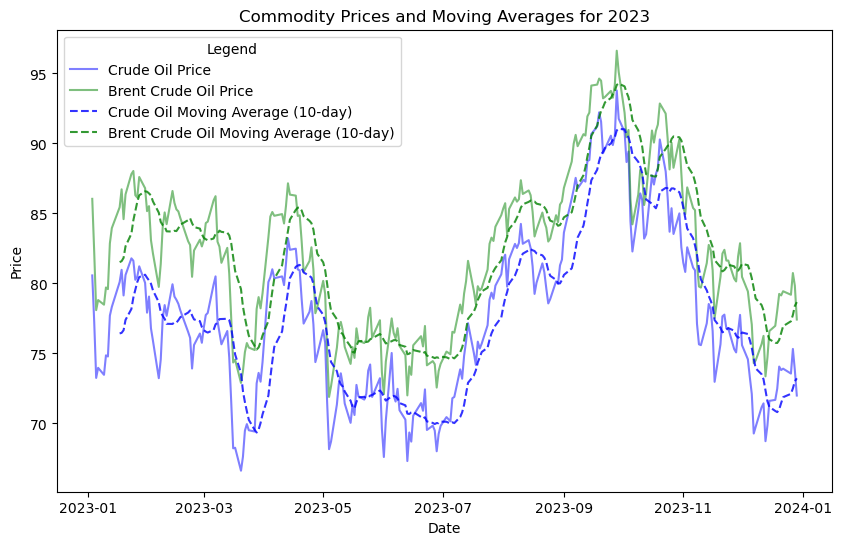

In [59]:
#I found this too wide so let's filter down on a year.

def plot_moving_averages_by_year(df, type1, type2, year):
    # Ensure 'date' column is in datetime format
    df['date'] = pd.to_datetime(df['date'])

    # Filter data for the specified year
    df_year = df[df['date'].dt.year == year]
    # print(f"Data filtered for year {year}:\n", df_year.head())  # Debugging step

    # Calculate Moving Averages using .loc to avoid SettingWithCopyWarning
    df_year.loc[df_year['commodity'] == type1, 'type1_MA'] = df_year[df_year['commodity'] == type1]['open'].rolling(window=10).mean()
    df_year.loc[df_year['commodity'] == type2, 'type2_MA'] = df_year[df_year['commodity'] == type2]['open'].rolling(window=10).mean()

    # Ensure both types have the same dates for comparison
    common_dates = set(df_year[df_year['commodity'] == type1]['date']) & set(df_year[df_year['commodity'] == type2]['date'])
    # print("Number of common dates:", len(common_dates))  # Debugging step
    if len(common_dates) == 0:
        print("No common dates found!")
        return

    # Filter data for the two types
    type1_data = df_year[(df_year['commodity'] == type1) & (df_year['date'].isin(common_dates))]
    type2_data = df_year[(df_year['commodity'] == type2) & (df_year['date'].isin(common_dates))]

    # Debugging: Check filtered data
    # print("Filtered Type1 data:\n", type1_data.head())
    # print("Filtered Type2 data:\n", type2_data.head())

    # Plot Type1, Type2, and their Moving Averages
    plt.figure(figsize=(10, 6))

    # Original Prices
    plt.plot(type1_data['date'], type1_data['open'], label=f'{type1} Price', color='blue', alpha=0.5)
    plt.plot(type2_data['date'], type2_data['open'], label=f'{type2} Price', color='green', alpha=0.5)

    # Moving Averages
    plt.plot(type1_data['date'], type1_data['type1_MA'], label=f'{type1} Moving Average (10-day)', color='blue', linestyle='--', alpha=0.8)
    plt.plot(type2_data['date'], type2_data['type2_MA'], label=f'{type2} Moving Average (10-day)', color='green', linestyle='--', alpha=0.8)

    # Add Title, Labels, and Legend
    plt.title(f'Commodity Prices and Moving Averages for {year}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend(title='Legend')
    plt.show()
    
plot_moving_averages_by_year(df, 'Crude Oil', 'Brent Crude Oil',2023)

Moving averages (MAs) provide insights by smoothing fluctuations in your data, revealing broader trends, and making it easier to interpret patterns. 

1. Long-term Trends
By averaging values over a defined "window" (e.g., 10 days), moving averages remove daily noise. They help you see whether prices are trending upward, downward, or staying steady over time. For instance:

If the moving average is rising, it signals a potential upward trend.

If it's falling, it indicates a downward trend.

2. Volatility Reduction
Raw data often contains sharp spikes or dips due to market volatility. MAs provide a smoothed view, helping you identify stable patterns without being distracted by short-term fluctuations.

3. Comparison of Multiple Data Sets
If you're analyzing two commodities (e.g., Type 1 and Type 2), moving averages let you compare their general trends. For example:

A divergence in the two MAs may indicate differing market behavior or performance.

Convergence could signal that both commodities are behaving similarly over the specified window.

4. Signal Crossovers (Advanced Use)
In financial and market analysis, the interaction between shorter and longer moving averages can provide actionable signals:

Golden Cross: A short-term moving average crossing above a long-term moving average may suggest an upward trend.

Death Cross: A short-term MA crossing below a long-term MA might indicate a downturn.

These crossovers are commonly used to predict price momentum or potential buy/sell signals.

5. Support and Resistance
Prices often hover around moving averages and use them as "support" or "resistance" levels. If prices cross above an MA, it may signify bullish momentum, while dropping below could indicate bearish sentiment.

#### Next Steps will contain Time Series

Just a recal ARIMA(p,d,q) if it is ARIMA(2,dq) this means we have alpha + coefficent * yesterday + coeffcient

Then the intergrated part is differencing when you compare the values against the prior date to see if the values are stationary or not. There is a test called Augmented Dickey-Fuller test is a test for mean, variance and covaraiance over time. 

In [64]:
from statsmodels.tsa.stattools import adfuller

# Extract the series you want to test
series = df['open']  # Replace 'open' with the column you want to analyze

# Perform the Augmented Dickey-Fuller test
result = adfuller(series, autolag='AIC')  # 'AIC' helps choose the best lag length

# Print results
print("ADF Statistic:", result[0])  # Test statistic
print("p-value:", result[1])  # P-value of the test
print("Critical Values:", result[4])  # Critical values for different significance levels

# Check if p-value is below the threshold (e.g., 0.05)
if result[1] <= 0.05:
    print("The data is stationary (reject the null hypothesis).")
else:
    print("The data is non-stationary (fail to reject the null hypothesis).")

ADF Statistic: -2.3143221800300964
p-value: 0.16739038148811974
Critical Values: {'1%': -3.4305852991309678, '5%': -2.861643995552525, '10%': -2.5668253537117716}
The data is non-stationary (fail to reject the null hypothesis).


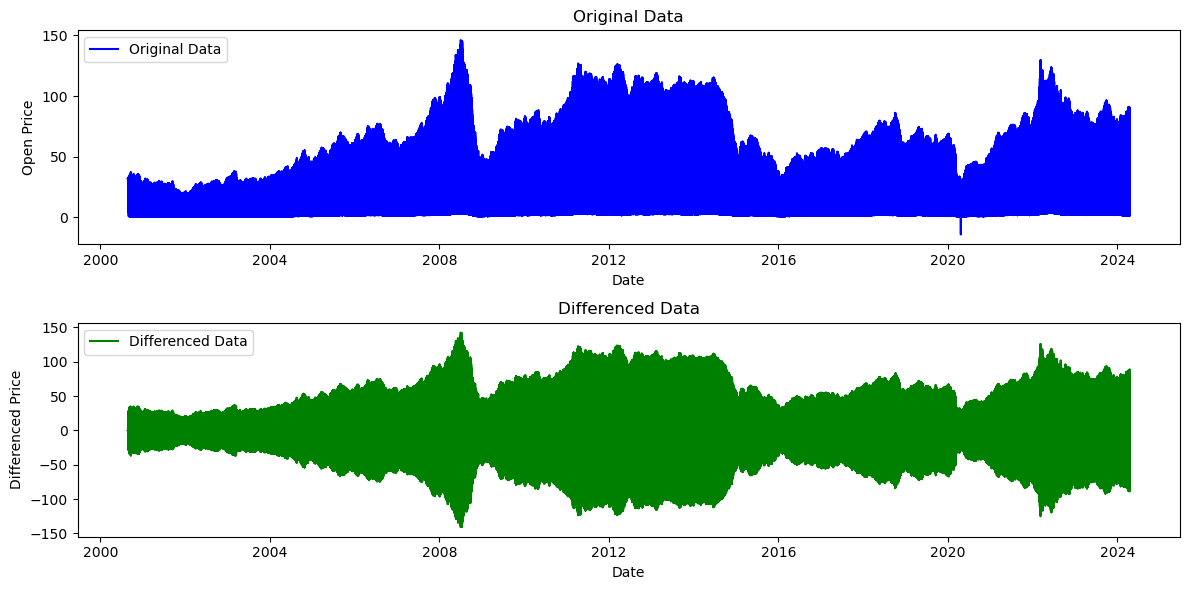

In [69]:
# Differencing the 'open' column to make the series stationary
df['diff_open'] = df['open'].diff().dropna()

# Plot the original data and the differenced data
plt.figure(figsize=(12, 6))

# Plot Original Data
plt.subplot(2, 1, 1)  # Subplot 1: Original data
plt.plot(df['date'], df['open'], label='Original Data', color='blue')
plt.title('Original Data')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.legend()

# Plot Differenced Data
plt.subplot(2, 1, 2)  # Subplot 2: Differenced data
plt.plot(df['date'], df['diff_open'], label='Differenced Data', color='green')
plt.title('Differenced Data')
plt.xlabel('Date')
plt.ylabel('Differenced Price')
plt.legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [71]:

# Extract the series you want to test
series = df['diff_open'].dropna()  # Replace 'open' with the column you want to analyze

# Perform the Augmented Dickey-Fuller test
result = adfuller(series, autolag='AIC')  # 'AIC' helps choose the best lag length

# Print results
print("ADF Statistic:", result[0])  # Test statistic
print("p-value:", result[1])  # P-value of the test
print("Critical Values:", result[4])  # Critical values for different significance levels

# Check if p-value is below the threshold (e.g., 0.05)
if result[1] <= 0.05:
    print("The data is stationary (reject the null hypothesis).")
else:
    print("The data is non-stationary (fail to reject the null hypothesis).")

ADF Statistic: -44.467369581881975
p-value: 0.0
Critical Values: {'1%': -3.430585307597879, '5%': -2.8616439992945115, '10%': -2.5668253557035445}
The data is stationary (reject the null hypothesis).


if the data isn't stationary then you want to diff onces more.


In [72]:
from statsmodels.tsa.ar_model import AutoReg

# Fit autoregressive model with lag=2
ar_model = AutoReg(df['open'], lags=2)
ar_results = ar_model.fit()
print(ar_results.summary())

                            AutoReg Model Results                             
Dep. Variable:                   open   No. Observations:                27845
Model:                     AutoReg(2)   Log Likelihood             -139242.150
Method:               Conditional MLE   S.D. of innovations             35.947
Date:                Tue, 15 Apr 2025   AIC                         278492.300
Time:                        15:47:57   BIC                         278525.237
Sample:                             2   HQIC                        278502.906
                                27845                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.2561      0.321     94.227      0.000      29.627      30.885
open.L1       -0.0690      0.006    -11.523      0.000      -0.081      -0.057
open.L2       -0.0420      0.006     -7.021      0.0

C:\Users\kkwan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [73]:
ar_model = AutoReg(df['open'], lags=1)
ar_results = ar_model.fit()
print(ar_results.summary())

                            AutoReg Model Results                             
Dep. Variable:                   open   No. Observations:                27845
Model:                     AutoReg(1)   Log Likelihood             -139271.290
Method:               Conditional MLE   S.D. of innovations             35.978
Date:                Tue, 15 Apr 2025   AIC                         278548.579
Time:                        15:50:56   BIC                         278573.282
Sample:                             1   HQIC                        278556.534
                                27845                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.0356      0.270    107.462      0.000      28.506      29.565
open.L1       -0.0662      0.006    -11.073      0.000      -0.078      -0.054
                                    Roots           

C:\Users\kkwan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [74]:
ar_model = AutoReg(df['open'], lags=3)
ar_results = ar_model.fit()
print(ar_results.summary())

                            AutoReg Model Results                             
Dep. Variable:                   open   No. Observations:                27845
Model:                     AutoReg(3)   Log Likelihood             -139228.431
Method:               Conditional MLE   S.D. of innovations             35.935
Date:                Tue, 15 Apr 2025   AIC                         278466.861
Time:                        15:53:58   BIC                         278508.033
Sample:                             3   HQIC                        278480.119
                                27845                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.4779      0.369     79.963      0.000      28.755      30.200
open.L1       -0.0679      0.006    -11.335      0.000      -0.080      -0.056
open.L2       -0.0403      0.006     -6.712      0.0

C:\Users\kkwan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


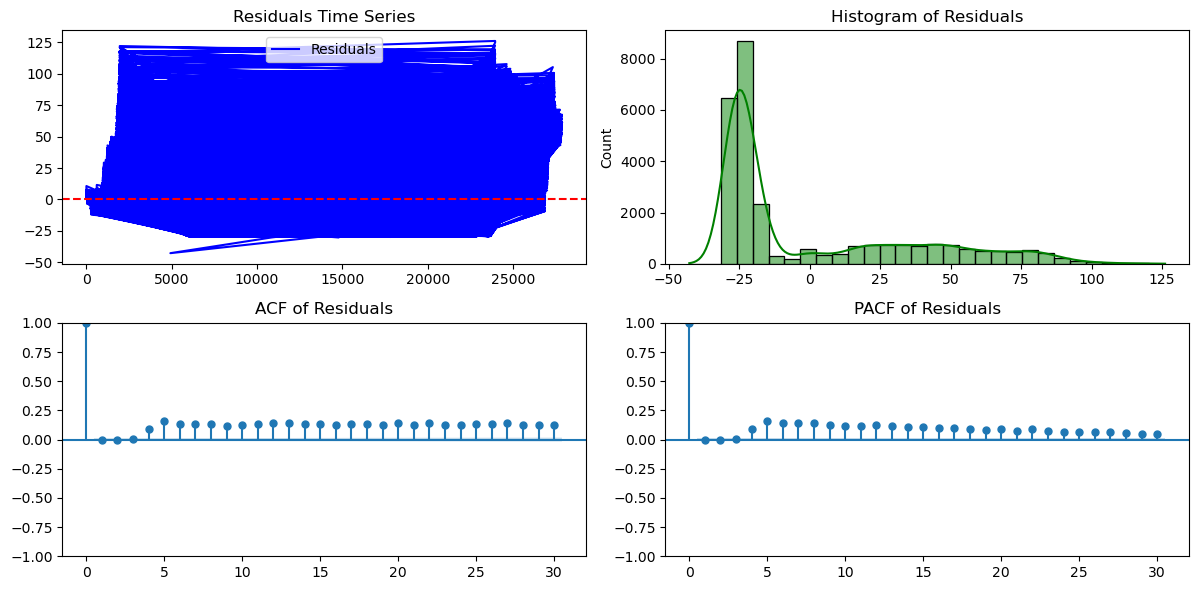

In [75]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.stats import shapiro, jarque_bera
import seaborn as sns

# Get residuals from the fitted model
residuals = ar_results.resid

# Plot residuals
plt.figure(figsize=(12, 6))

# Residual time series plot
plt.subplot(2, 2, 1)
plt.plot(residuals, label='Residuals', color='blue')
plt.axhline(0, linestyle='--', color='red')
plt.title('Residuals Time Series')
plt.legend()

# Histogram of residuals
plt.subplot(2, 2, 2)
sns.histplot(residuals, kde=True, color='green', bins=30)
plt.title('Histogram of Residuals')

# ACF plot for residuals
plt.subplot(2, 2, 3)
plot_acf(residuals, lags=30, ax=plt.gca())
plt.title('ACF of Residuals')

# PACF plot for residuals
plt.subplot(2, 2, 4)
plot_pacf(residuals, lags=30, ax=plt.gca(), method='ywm')
plt.title('PACF of Residuals')

plt.tight_layout()
plt.show()

In [76]:
# Shapiro-Wilk Test
shapiro_test = shapiro(residuals)
print(f"Shapiro-Wilk Test: Statistic={shapiro_test.statistic}, p-value={shapiro_test.pvalue}")

# Jarque-Bera Test
jb_test = jarque_bera(residuals)
print(f"Jarque-Bera Test: Statistic={jb_test[0]}, p-value={jb_test[1]}")

if jb_test[1] > 0.05:
    print("Residuals are normally distributed (fail to reject null hypothesis).")
else:
    print("Residuals are not normally distributed (reject null hypothesis).")

Shapiro-Wilk Test: Statistic=0.7652209401130676, p-value=0.0
Jarque-Bera Test: Statistic=5987.108810077674, p-value=0.0
Residuals are not normally distributed (reject null hypothesis).


C:\Users\kkwan\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [77]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Ljung-Box test
ljung_box_result = acorr_ljungbox(residuals, lags=[10], return_df=True)
print(ljung_box_result)

if ljung_box_result['lb_pvalue'].iloc[0] > 0.05:
    print("Residuals are not autocorrelated (fail to reject null hypothesis).")
else:
    print("Residuals are autocorrelated (reject null hypothesis).")

        lb_stat  lb_pvalue
10  3156.667961        0.0
Residuals are autocorrelated (reject null hypothesis).
